# **Traffic Sign Image Classification 96% CNN**

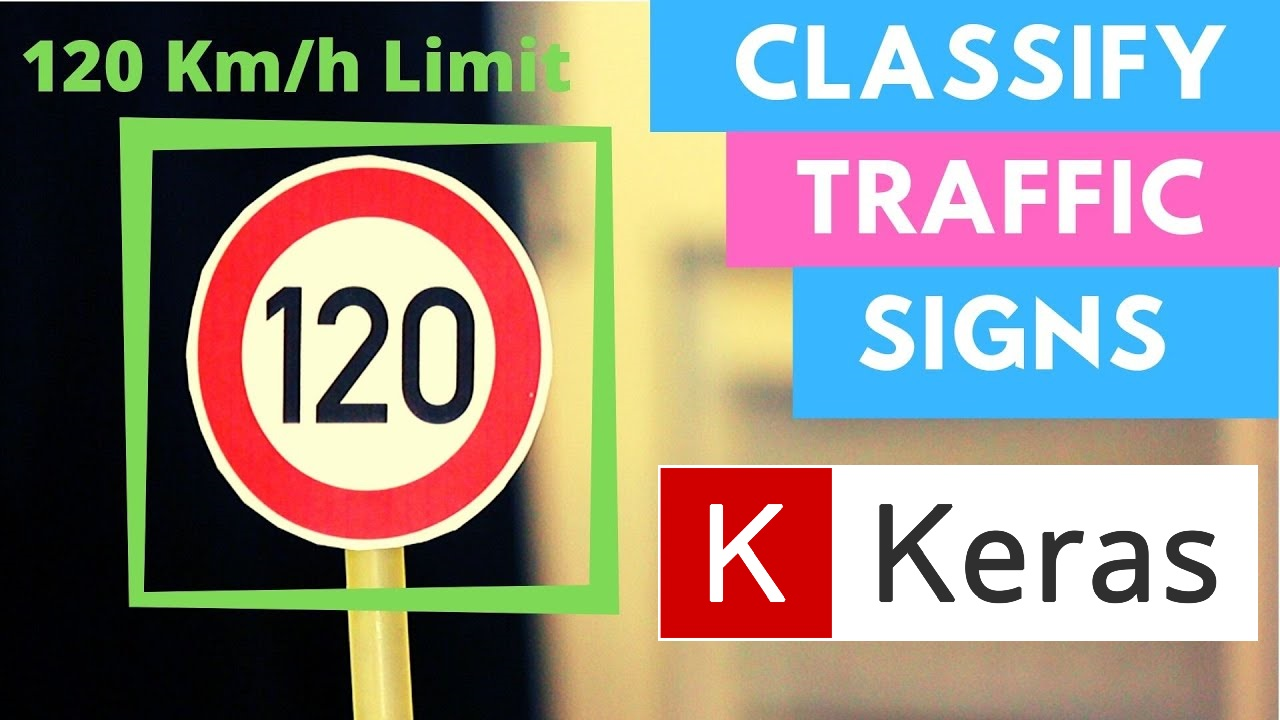

1. Download and Imports
2. Loading Dataset (Traffic Signs Images)
3. Data Splitting and conversion
4. Creating and Compiling the Model
5. Training the Model
6. Visualizing the performance of the Model during Training Phase
7. Loading Test Dataset and Evaluating the Model
8. Saving the Model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Download and Imports

In [3]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# 2. Loading Dataset (Traffic Signs Images)

In [5]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 610M/612M [00:07<00:00, 25.4MB/s]
100% 612M/612M [00:07<00:00, 80.3MB/s]


In [7]:
!mv gtsrb-german-traffic-sign.zip /content/drive/My\ Drive/

In [10]:
!unzip /content/drive/My\ Drive/gtsrb-german-traffic-sign.zip -d /content/drive/My\ Drive/GTSRB

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/GTSRB/train/5/00005_00053_00010.png  
  inflating: /content/drive/My Drive/GTSRB/train/5/00005_00053_00011.png  
  inflating: /content/drive/My Drive/GTSRB/train/5/00005_00053_00012.png  
  inflating: /content/drive/My Drive/GTSRB/train/5/00005_00053_00013.png  
  inflating: /content/drive/My Drive/GTSRB/train/5/00005_00053_00014.png  
  inflating: /content/drive/My Drive/GTSRB/train/5/00005_00053_00015.png  
  inflating: /content/drive/My Drive/GTSRB/train/5/00005_00053_00016.png  
  inflating: /content/drive/My Drive/GTSRB/train/5/00005_00053_00017.png  
  inflating: /content/drive/My Drive/GTSRB/train/5/00005_00053_00018.png  
  inflating: /content/drive/My Drive/GTSRB/train/5/00005_00053_00019.png  
  inflating: /content/drive/My Drive/GTSRB/train/5/00005_00053_00020.png  
  inflating: /content/drive/My Drive/GTSRB/train/5/00005_00053_00021.png  
  inflating: /content/drive/My Drive/GTSRB/train/

In [12]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join('/content/drive/MyDrive/GTSRB/','Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# 3. Data Splitting and conversion

In [13]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# 4. Creating and Compiling the Model

In [14]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

# 5. Training the Model

In [15]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.2471 - loss: 3.8381 - val_accuracy: 0.6908 - val_loss: 1.0886
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6005 - loss: 1.3165 - val_accuracy: 0.8532 - val_loss: 0.5200
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7448 - loss: 0.8321 - val_accuracy: 0.9180 - val_loss: 0.3052
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8218 - loss: 0.5909 - val_accuracy: 0.9081 - val_loss: 0.3274
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8680 - loss: 0.4431 - val_accuracy: 0.9425 - val_loss: 0.1983
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8948 - loss: 0.3545 - val_accuracy: 0.9722 - val_loss: 0.1040
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9092 - loss: 0.3099 - val_accuracy: 0.9740 - val_loss: 0.0944
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9189 - loss: 0.2812 - val_accuracy:

# 6. Visualizing the performance of the Model during Training Phase

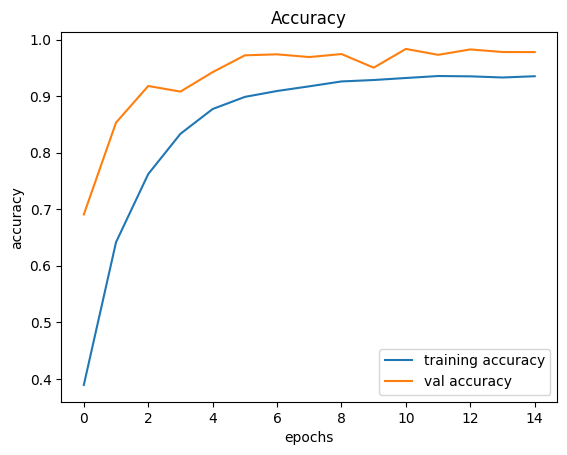

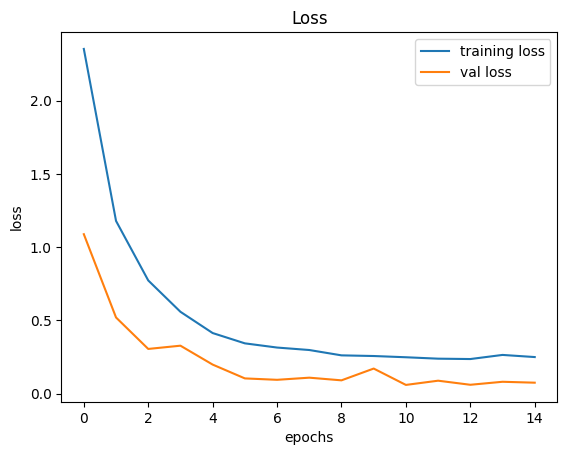

In [16]:
# Plotting performance graphs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# 7. Loading Test Dataset and Evaluating the Model

In [18]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('/content/drive/MyDrive/GTSRB/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('/content/drive/MyDrive/GTSRB/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
0.9338875692794932


# 8. Savinng the Model

In [22]:
model.save('/content/drive/My Drive/model.keras')

In [23]:
!kaggle datasets download -d ganeshishwarpatil/gtsrblabel-names

Dataset URL: https://www.kaggle.com/datasets/ganeshishwarpatil/gtsrblabel-names
License(s): unknown
  0% 0.00/651 [00:00<?, ?B/s]
100% 651/651 [00:00<00:00, 1.43MB/s]


In [24]:
!mv gtsrblabel-names.zip /content/drive/My\ Drive/

In [25]:
!unzip /content/drive/My\ Drive/gtsrblabel-names.zip -d /content/drive/My\ Drive/traffic_signs_labels

Archive:  /content/drive/My Drive/gtsrblabel-names.zip
  inflating: /content/drive/My Drive/traffic_signs_labels/label_names.csv  


In [27]:
from tensorflow.keras.models import load_model

# Load the model from Drive
model = load_model('/content/drive/My Drive/model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [29]:
label_path = '/content/drive/My Drive/traffic_signs_labels/'

In [30]:
import pandas as pd
labels = pd.read_csv(label_path+'label_names.csv')
print(labels.head())

   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)


In [31]:
def get_label(class_id):
    label = labels[labels['ClassId'] == class_id]['SignName'].values
    if len(label) > 0:
        return label[0]
    else:
        return "Unknown"

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


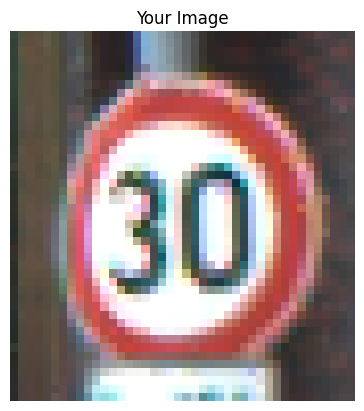

Predicted Class ID: 1
Predicted Sign: Speed limit (30km/h)


In [34]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
#apne google drive pe image upload karke, yahan uska path likh dena
image_path = '/content/drive/MyDrive/GTSRB/Test/00001.png'
image = Image.open(image_path)
image = image.resize([30, 30])
data=[]
data.append(np.array(image))
X_test=np.array(data)
with tf.device('/GPU:0'):
    predictions = model.predict(X_test)
predicted_class = np.argmax(predictions, axis=1)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.rectangle(img, (64, 64), (64, 64), (255, 0, 0), 2)
plt.imshow(img)
plt.title(f"Your Image")
plt.axis('off')
plt.show()
print(f"Predicted Class ID: {predicted_class[0]}")
label = get_label(predicted_class[0])
print(f"Predicted Sign: {label}")

Saving Screenshot 2025-01-18 214934.png to Screenshot 2025-01-18 214934.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


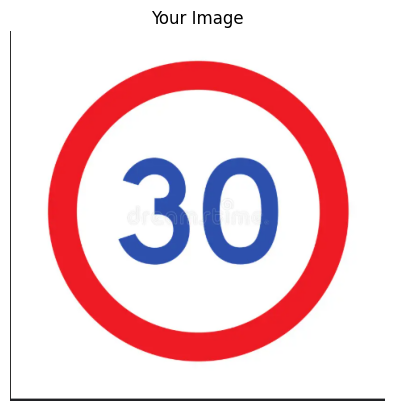

Predicted Class ID: 1
Predicted Sign: Speed limit (30km/h)


In [37]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Upload image at runtime
uploaded = files.upload()  # Opens a file upload dialog in Colab

# Extract the file path of the uploaded image
image_path = list(uploaded.keys())[0]

# Preprocess the image
image = load_img(image_path, target_size=(30, 30))  # Resize the image to the input size of the model
data = [img_to_array(image)]  # Convert to array
X_test = np.array(data)  # Prepare as input for the model

# Make predictions
with tf.device('/GPU:0'):  # Optional: Use GPU if available
    predictions = model.predict(X_test)
predicted_class = np.argmax(predictions, axis=1)

# Display the uploaded image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Your Image")
plt.axis('off')
plt.show()

# Print predictions
print(f"Predicted Class ID: {predicted_class[0]}")
label = get_label(predicted_class[0])  # Define a `get_label` function to map class IDs to labels
print(f"Predicted Sign: {label}")